## First Steps

Figure out Bayesian Network

In [1]:
# This lets me import the Python modules from the directory below this one
import sys
sys.path.insert(0, '../../reynard')


In [2]:
from pylab import *
import matplotlib.pyplot as plt
import os
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
from reynard_puzzle import Puzzle
from reynard_agent import Agent
from reynard_constants import letter_frequency, two_letter_word_frequency

## Baby Steps towards a BN

How do I design it?  I need to experiment. My thoughts are that I can follow a pattern of looking for one letter words
and then looking for two letter words and then three and so on.  The Network will get quite large.  Initially doing it by hand may lend itself to figuring out how to do it programatically.

# OneLetterWords

In [3]:
# Create Wrapper around the Bayesian Network
bn=gum.BayesNet('cryptogram Solver')

In [4]:
# Create the startNode
bn.add(gum.LabelizedVariable('OneLetterWords','Are there any one letter words?',['A','I']))
# Assign Initial Probabilities
bn.cpt('OneLetterWords').fillWith([0.5297,0.4703]);
bn

(pyAgrum.BayesNet<double>@0x55c4473e5070) BN{nodes: 1, arcs: 0, domainSize: 2, dim: 2}

## So Far

At the moment we've created the start node.  Once the network is setup we can add follow on nodes.   So lets create a node for twoLetterWords and then connect the two

# TwoLetterWords

In working through the below cell I thought about using py_enchant

In [5]:
# Create the startNode

tlw = gum.LabelizedVariable('TwoLetterWords','Are there any two letter words?', two_letter_word_frequency)
bn.add(tlw)
# ['OF','TO','IN','IT','IS','BE','AS','AT','SO','WE','HE','BY','OR','ON','DO','IF','ME','MY', 'UP', 'AN','GO','NO','US', 'AM']
# This is really dependent on knowing what character came in. We need to assign 0 probabilities to the ones that begin with a letter we don't know. 
temp_probsA = [0 for i in range(len(two_letter_word_frequency)) ]
temp_probsI = [0 for i in range(len(two_letter_word_frequency))]
for i in range(len(two_letter_word_frequency)):
    if two_letter_word_frequency[i].startswith('A'):
        temp_probsA[i] = letter_frequency[two_letter_word_frequency[i][1]]
    elif two_letter_word_frequency[i].startswith('I'):
        temp_probsI[i] = letter_frequency[two_letter_word_frequency[i][1]]
# Now need to sum the arrays
probsA = list(temp_probsA/sum(temp_probsA))
probsI = list(temp_probsI/sum(temp_probsI))

# Now we have the actual probabilities of the two letter words.  We can go one more once we know if A or I is picked but for initialization we'll just leave it like it is.
bn.addArc('OneLetterWords','TwoLetterWords')
bn.cpt('TwoLetterWords')[:]= [probsA,probsI]

In [11]:
bn

(pyAgrum.BayesNet<double>@0x55c4473e5070) BN{nodes: 2, arcs: 1, domainSize: 48, dim: 50}

In [28]:
bn.cpt("OneLetterWords")

(pyAgrum.Potential<double>@0x55c44801acc0) 
  OneLetterWords   |
A        |I        |
---------|---------|
 0.5297  | 0.4703  |

In [29]:
bn.cpt("TwoLetterWords")

(pyAgrum.Potential<double>@0x55c449315050) 
      ||  TwoLetterWords                                                                                                                                                                                                                               |
OneLet||OF       |TO       |IN       |IT       |IS       |BE       |AS       |AT       |SO       |WE       |HE       |BY       |OR       |ON       |DO       |IF       |ME       |MY       |UP       |AN       |GO       |NO       |US       |AM       |
------||---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|
A     || 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.2566  | 0.3110  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.2977  | 0.0000  | 0.0000  | 0.0000  | 0.1348  |
I     || 0.0000  | 0.0000  | 0.3146  | 0.3286  | 0.2711  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0857  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  |

# Now Do Inference

This uses the LazyPropogation *"an exact inference method that transforms the Bayesian network into a hypergraph called a join tree or a junction tree. This tree is constructed in order to optimize inference computations."*

In [14]:
ie=gum.LazyPropagation(bn)

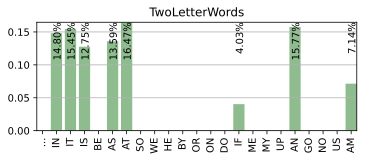

In [25]:
ie.makeInference()
gnb.showProba(ie.posterior("TwoLetterWords"))

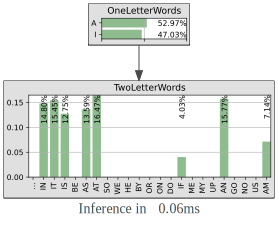

In [27]:
gnb.showInference(bn,evs={})

## Now lets set the OneLetterWord to A

In [32]:
ie.setEvidence({"OneLetterWords":[1.0,0.0]})
ie.makeInference()
ie.posterior("TwoLetterWords")

(pyAgrum.Potential<double>@0x55c4490f7f40) 
  TwoLetterWords                                                                                                                                                                                                                               |
OF       |TO       |IN       |IT       |IS       |BE       |AS       |AT       |SO       |WE       |HE       |BY       |OR       |ON       |DO       |IF       |ME       |MY       |UP       |AN       |GO       |NO       |US       |AM       |
---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|
 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.2566  | 0.3110  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.2977  | 0.0000  | 0.0000  | 0.0000  | 0.1348  |

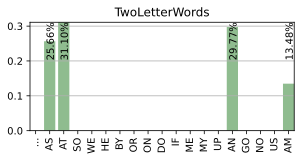

In [35]:
gnb.showProba(ie.posterior("TwoLetterWords"))

In [51]:
print()
print("Word Suggestion is {} with probability of {}.".format(two_letter_word_frequency[ie.posterior("TwoLetterWords")[:].argmax()],ie.posterior("TwoLetterWords")[:][ie.posterior("TwoLetterWords")[:].argmax()]))


Word Suggestion is AT with probability of 0.31095632412216545.


In [49]:
]

0.31095632412216545